In [63]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import TensorDataset, DataLoader
from PIL import Image

In [64]:
# To add your own Drive Run this cell.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
######################################################################
# OneLayerNetwork
######################################################################

class OneLayerNetwork(torch.nn.Module):
    def __init__(self):
        super(OneLayerNetwork, self).__init__()

        ### ========== TODO : START ========== ###
        ### part d: implement OneLayerNetwork with torch.nn.Linear
        #784 features get passed into the hidden layer of the neural network and
        #each feature gets 1 of 3 outputs

        self.linear = torch.nn.Linear(784, 3)
        ### ========== TODO : END ========== ###

    def forward(self, x):
        # x.shape = (n_batch, n_features) 
        ### ========== TODO : START ========== ###
        ### part d: implement the foward function
        outputs = self.linear(x)
        ### ========== TODO : END ========== ###
        return outputs

In [66]:
######################################################################
# TwoLayerNetwork
######################################################################

class TwoLayerNetwork(torch.nn.Module):
    def __init__(self):
        super(TwoLayerNetwork, self).__init__()
        ### ========== TODO : START ========== ###
        ### part g: implement TwoLayerNetwork with torch.nn.Linear
        self.linear_1 = torch.nn.Linear(784, 400)
        self.linear_2  = torch.nn.Linear(400, 3)
        ### ========== TODO : END ========== ###

    def forward(self, x):
        # x.shape = (n_batch, n_features)
        outputs = torch.sigmoid(self.linear_1(x))
        outputs = self.linear_2(outputs)
        ### ========== TODO : START ========== ###
        ### part g: implement the foward function
        
        ### ========== TODO : END ========== ###
        return outputs

In [67]:
# load data from csv
# X.shape = (n_examples, n_features), y.shape = (n_examples, )
def load_data(filename):
    data = np.loadtxt(filename)
    y = data[:, 0].astype(int)
    X = data[:, 1:].astype(np.float32) / 255
    return X, y

In [68]:
# plot one example
# x.shape = (features, )
def plot_img(x):
    x = x.reshape(28, 28)
    img = Image.fromarray(x*255)
    plt.figure()
    plt.imshow(img)
    return

In [69]:
def evaluate_loss(model, criterion, dataloader):
    model.eval()
    total_loss = 0.0
    for batch_X, batch_y in dataloader:
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        total_loss += loss.item()
        
    return total_loss / len(dataloader)

In [70]:
def evaluate_acc(model, dataloader):
    model.eval()
    total_acc = 0.0
    for batch_X, batch_y in dataloader:
        outputs = model(batch_X)
        predictions = torch.argmax(outputs, dim=1)
        total_acc += (predictions==batch_y).sum()
        
    return total_acc / len(dataloader.dataset)

In [71]:
def train(model, criterion, optimizer, train_loader, valid_loader):
    train_loss_list = []
    valid_loss_list = []
    train_acc_list = []
    valid_acc_list = []
    for epoch in range(1, 31):
        model.train()
        for batch_X, batch_y in train_loader:
            ### ========== TODO : START ========== ###
            ### part f: implement the training process
            #forward pass
      #https://pytorch.org/tutorials/recipes/recipes/zeroing_out_gradients.html
            optimizer.zero_grad()
            y_pred = model(batch_X)
            loss = criterion(y_pred, batch_y)
            loss.backward()
            optimizer.step() 
            ### ========== TODO : END ========== ###
            
        train_loss = evaluate_loss(model, criterion, train_loader)
        valid_loss = evaluate_loss(model, criterion, valid_loader)
        train_acc = evaluate_acc(model, train_loader)
        valid_acc = evaluate_acc(model, valid_loader)
        train_loss_list.append(train_loss)
        valid_loss_list.append(valid_loss)
        train_acc_list.append(train_acc)
        valid_acc_list.append(valid_acc)

        print(f"| epoch {epoch:2d} | train loss {train_loss:.6f} | train acc {train_acc:.6f} | valid loss {valid_loss:.6f} | valid acc {valid_acc:.6f} |")

    return train_loss_list, valid_loss_list, train_acc_list, valid_acc_list

0
1
2
Data preparation...
Start training OneLayerNetwork...
| epoch  1 | train loss 1.075398 | train acc 0.453333 | valid loss 1.084938 | valid acc 0.453333 |
| epoch  2 | train loss 1.021364 | train acc 0.566667 | valid loss 1.031102 | valid acc 0.553333 |
| epoch  3 | train loss 0.972648 | train acc 0.630000 | valid loss 0.982742 | valid acc 0.593333 |
| epoch  4 | train loss 0.928398 | train acc 0.710000 | valid loss 0.938953 | valid acc 0.640000 |
| epoch  5 | train loss 0.887963 | train acc 0.783333 | valid loss 0.899045 | valid acc 0.700000 |
| epoch  6 | train loss 0.850839 | train acc 0.826667 | valid loss 0.862485 | valid acc 0.753333 |
| epoch  7 | train loss 0.816627 | train acc 0.850000 | valid loss 0.828852 | valid acc 0.793333 |
| epoch  8 | train loss 0.785000 | train acc 0.886667 | valid loss 0.797807 | valid acc 0.846667 |
| epoch  9 | train loss 0.755688 | train acc 0.900000 | valid loss 0.769067 | valid acc 0.866667 |
| epoch 10 | train loss 0.728461 | train acc 0.90

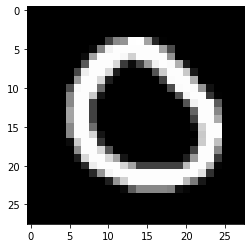

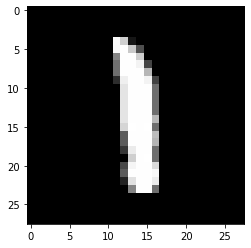

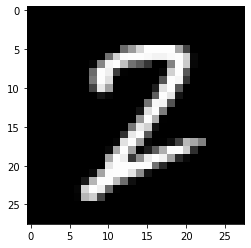

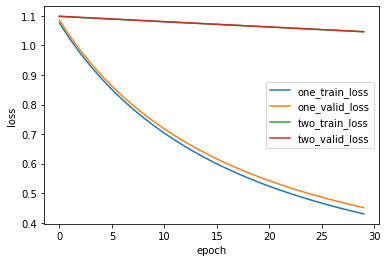

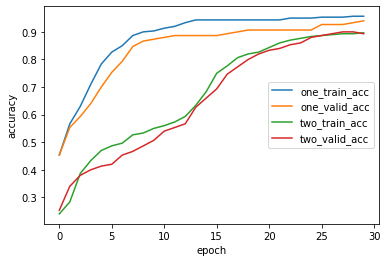

The test accuracy is:
test_model_one_acc:  0.9599999785423279
test_model_two_acc:  0.8999999761581421
Start training OneLayerNetwork using Adam optimizer...
| epoch  1 | train loss 0.295220 | train acc 0.966667 | valid loss 0.320135 | valid acc 0.940000 |
| epoch  2 | train loss 0.227029 | train acc 0.976667 | valid loss 0.254286 | valid acc 0.946667 |
| epoch  3 | train loss 0.186676 | train acc 0.980000 | valid loss 0.215689 | valid acc 0.953333 |
| epoch  4 | train loss 0.159558 | train acc 0.980000 | valid loss 0.190220 | valid acc 0.966667 |
| epoch  5 | train loss 0.139716 | train acc 0.986667 | valid loss 0.171918 | valid acc 0.966667 |
| epoch  6 | train loss 0.124376 | train acc 0.986667 | valid loss 0.158025 | valid acc 0.966667 |
| epoch  7 | train loss 0.112055 | train acc 0.986667 | valid loss 0.147062 | valid acc 0.966667 |
| epoch  8 | train loss 0.101880 | train acc 0.986667 | valid loss 0.138159 | valid acc 0.966667 |
| epoch  9 | train loss 0.093299 | train acc 0.9866

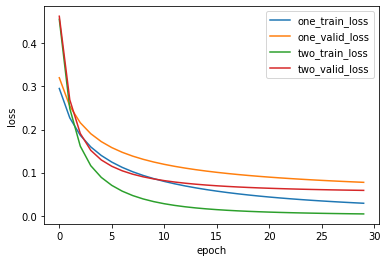

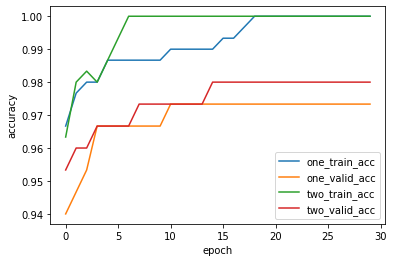

The test accuracy is:
test_model_one_acc:  0.9733333587646484
test_model_two_acc:  0.9666666388511658


In [72]:
######################################################################
# main
######################################################################

def main():

    # fix random seed
    np.random.seed(0)
    torch.manual_seed(0)

    # load data with correct file path

    ### ========== TODO : START ========== ###
    data_directory_path =  "/content/drive/My Drive/m146hw3"
    ### ========== TODO : END ========== ###

    # X.shape = (n_examples, n_features)
    # y.shape = (n_examples, )
    X_train, y_train = load_data(os.path.join(data_directory_path, "ps3_train.csv"))
    X_valid, y_valid = load_data(os.path.join(data_directory_path, "ps3_valid.csv"))
    X_test, y_test = load_data(os.path.join(data_directory_path, "ps3_test.csv"))

    ### ========== TODO : START ========== ###
    ### part a: print out three training images with different labels
    # chose 3 random examples from the training data and checked their labels to 
    # see if they were all unique.
    # Was originally using np.unique(np.random.randint(X_train.shape[0], size = 
    # 3)) to generate the examples, but if there were same labeled examples,
    # there's no way to run randint again to generate new random integers 
    # because of np.random.seed(0)

    plot_img(X_train[1])
    plot_img(X_train[6])
    plot_img(X_train[100])
    print(y_train[1])
    print(y_train[6])
    print(y_train[100])
    
    ### ========== TODO : END ========== ###

    print("Data preparation...")
    
    ### ========== TODO : START ========== ###
    ### part b: convert numpy arrays to tensors
    #https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html
    X_train_ten = torch.from_numpy(X_train)
    X_valid_ten = torch.from_numpy(X_valid)
    X_test_ten = torch.from_numpy(X_test)
    y_train_ten = torch.from_numpy(y_train)
    y_valid_ten = torch.from_numpy(y_valid)
    y_test_ten = torch.from_numpy(y_test)

    ### ========== TODO : END ========== ###

    ### ========== TODO : START ========== ###
    ### part c: prepare dataloaders for training, validation, and testing
    ###         we expect to get a batch of pairs (x_n, y_n) from the dataloader
    #DataLoader(dataset, batch_size=1, shuffle=False, sampler=None,
           #batch_sampler=None, num_workers=0, collate_fn=None,
           #pin_memory=False, drop_last=False, timeout=0,
           #worker_init_fn=None, *, prefetch_factor=2,
           #persistent_workers=False)
    #For the train data
    dataset = TensorDataset(X_train_ten, y_train_ten)
    train_loader = DataLoader(dataset, batch_size=10)

    #For the valid data
    dataset = TensorDataset(X_valid_ten, y_valid_ten)
    valid_loader = DataLoader(dataset, batch_size=10)

    #For the test data
    dataset = TensorDataset(X_test_ten, y_test_ten)
    test_loader = DataLoader(dataset, batch_size=10)
    
    ### ========== TODO : END ========== ###

    ### ========== TODO : START ========== ###
    ### part e: prepare OneLayerNetwork, criterion, and optimizer
    
    model_one = OneLayerNetwork() 
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model_one.parameters(), lr=0.0005) 
    
    ### ========== TODO : END ========== ###

    print("Start training OneLayerNetwork...")
    results_one = train(model_one, criterion, optimizer, train_loader, valid_loader)
    print("Done!")

    ### ========== TODO : START ========== ###
    ### part h: prepare TwoLayerNetwork, criterion, and optimizer
    model_two = TwoLayerNetwork()
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model_two.parameters(), lr = 0.0005)
    
    ### ========== TODO : END ========== ###

    print("Start training TwoLayerNetwork...")
    results_two = train(model_two, criterion, optimizer, train_loader, valid_loader)
    print("Done!")

    one_train_loss, one_valid_loss, one_train_acc, one_valid_acc = results_one
    two_train_loss, two_valid_loss, two_train_acc, two_valid_acc = results_two

    ### ========== TODO : START ========== ###
    ### part i: generate a plot to comare one_train_loss, one_valid_loss, two_train_loss, two_valid_loss
    plt.show()
    plt.plot(results_one[0])
    plt.plot(results_one[1])
    plt.plot(results_two[0])
    plt.plot(results_two[1])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['one_train_loss', 'one_valid_loss', 'two_train_loss', 'two_valid_loss'], loc ='center right')
    plt.show()
    ### ========== TODO : END ========== ###

    ### ========== TODO : START ========== ###
    ### part j: generate a plot to comare one_train_acc, one_valid_acc, two_train_acc, two_valid_acc
    plt.plot(results_one[2])
    plt.plot(results_one[3])
    plt.plot(results_two[2])
    plt.plot(results_two[3])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['one_train_acc', 'one_valid_acc', 'two_train_acc', 'two_valid_acc'], loc ='center right')
    plt.show()
    ### ========== TODO : END ========== ##

    ### ========== TODO : START ========== ###
    ### part k: calculate the test accuracy
    test_model_one_acc = evaluate_acc(model_one, test_loader)
    test_model_two_acc = evaluate_acc(model_two, test_loader)
    print('The test accuracy is:')
    print('test_model_one_acc: ', test_model_one_acc.item())
    print('test_model_two_acc: ', test_model_two_acc.item())
    ### ========== TODO : END ========== ###

    ### ========== TODO : START ========== ###
    ### part l: replace the SGD optimizer with the Adam optimizer and do the experiments again
    optimizer = torch.optim.Adam(model_one.parameters(), lr=0.0005)
    print("Start training OneLayerNetwork using Adam optimizer...")
    results_one = train(model_one, criterion, optimizer, train_loader, valid_loader)
    print("Done!")

    optimizer = torch.optim.Adam(model_two.parameters(), lr=0.0005)
    print("Start training TwoLayerNetwork using Adam optimizer...")
    results_two = train(model_two, criterion, optimizer, train_loader, valid_loader)
    print("Done!")

    one_train_loss, one_valid_loss, one_train_acc, one_valid_acc = results_one
    two_train_loss, two_valid_loss, two_train_acc, two_valid_acc = results_two

    plt.show()
    plt.plot(results_one[0])
    plt.plot(results_one[1])
    plt.plot(results_two[0])
    plt.plot(results_two[1])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['one_train_loss', 'one_valid_loss', 'two_train_loss', 'two_valid_loss'], loc ='upper right')
    plt.show()


    plt.plot(results_one[2])
    plt.plot(results_one[3])
    plt.plot(results_two[2])
    plt.plot(results_two[3])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['one_train_acc', 'one_valid_acc', 'two_train_acc', 'two_valid_acc'], loc ='lower right')
    plt.show()



    test_model_one_acc = evaluate_acc(model_one, test_loader)
    test_model_two_acc = evaluate_acc(model_two, test_loader)
    print('The test accuracy is:')
    print('test_model_one_acc: ', test_model_one_acc.item())
    print('test_model_two_acc: ', test_model_two_acc.item())
    ### ========== TODO : END ========== ###



if __name__ == "__main__":
    main()